![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Introduccion al aprendizaje no supervisado

El aprendizaje no supervisado, también conocido como machine learning no supervisado, utiliza algoritmos de machine learning para analizar y agrupar conjuntos de datos no etiquetados. Estos algoritmos descubren patrones ocultos o agrupaciones de datos sin necesidad de intervención humana. Su capacidad de descubrir similitudes y diferencias en la información los convierte en la solución ideal para análisis exploratorio de datos, estrategias de venta cruzada, segmentación de clientes y reconocimiento de imágenes.

Los modelos de aprendizaje no supervisados se utilizan para tres tareas principales:

> * Agrupamiento (Clustering)
> * Reducción de dimensionalidad

A continuación, definiremos cada método de aprendizaje y destacaremos los algoritmos y enfoques comunes para llevarlos a cabo de manera efectiva.

Agrupamiento

* k-means
* DBSCAN
* Cluster jerarquico

k-means

Vamos a agrupar los clientes en consideracion del ingreso y su puntaje

In [ ]:
# importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/samples/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Ingresos,Puntaje
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Vemos en las primeras filas la informacion del dataset

In [ ]:
data.rename(columns={'Annual Income (k$)': 'Ingresos', 'Spending Score (1-100)': 'Puntaje'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Ingresos    200 non-null    int64 
 4   Puntaje     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


todas son de tipo entero a excepcion del Gender que es un string

In [ ]:
data.describe()

,CustomerID,Age,Ingresos,Puntaje
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# me quedo con la columna de ingresos y puntajes
x = data.iloc[:, [3, 4]].values
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

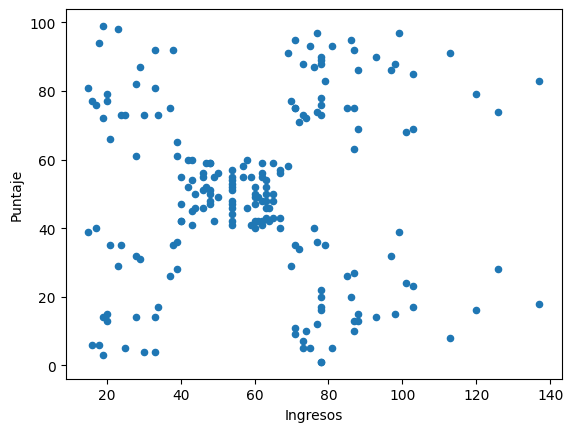

In [ ]:
data.plot.scatter(x='Ingresos', y='Puntaje')
plt.show()

In [ ]:
# calcular los clusters -- Tecnica del codo
from sklearn.cluster import KMeans


In [ ]:
# aca guarda las varianzas
y = []

# n_clusters cantidad de clusters, vamos a iterar de 1 a 10
# n_init --> que pruebe esta cantidad de veces con distintos centroides
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
  kmeans.fit(x)
  # WCSS
  y.append(kmeans.inertia_)
  print(f"cantidad de cluster: {i}  ---- WCSS o Varianza: {kmeans.inertia_}")



cantidad de cluster: 1  ---- WCSS o Varianza: 269981.28000000014
cantidad de cluster: 2  ---- WCSS o Varianza: 181363.59595959607
cantidad de cluster: 3  ---- WCSS o Varianza: 106348.37306211119
cantidad de cluster: 4  ---- WCSS o Varianza: 73679.78903948837
cantidad de cluster: 5  ---- WCSS o Varianza: 44448.45544793369
cantidad de cluster: 6  ---- WCSS o Varianza: 37233.81451071002
cantidad de cluster: 7  ---- WCSS o Varianza: 30241.34361793659
cantidad de cluster: 8  ---- WCSS o Varianza: 25036.417604033977
cantidad de cluster: 9  ---- WCSS o Varianza: 21916.79478984372
cantidad de cluster: 10  ---- WCSS o Varianza: 20072.070939404


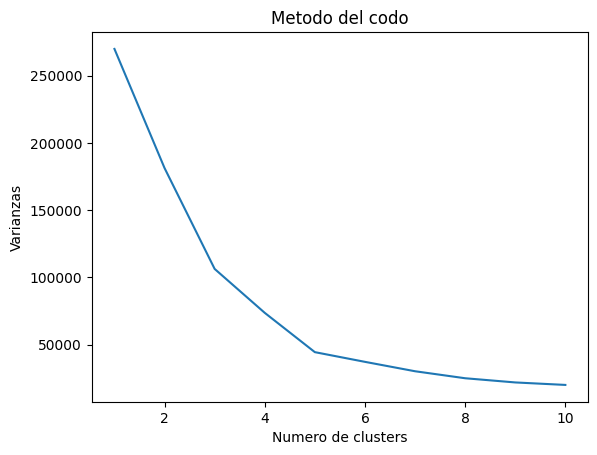

In [ ]:
plt.plot(range(1,11), y)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Varianzas')
plt.show()

In [ ]:
# creamos una instancia de k-means con 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)   # .fit_predict(x)

In [ ]:
y_kmeans = kmeans.fit_predict(x)

<Axes: xlabel='Ingresos', ylabel='Puntaje'>

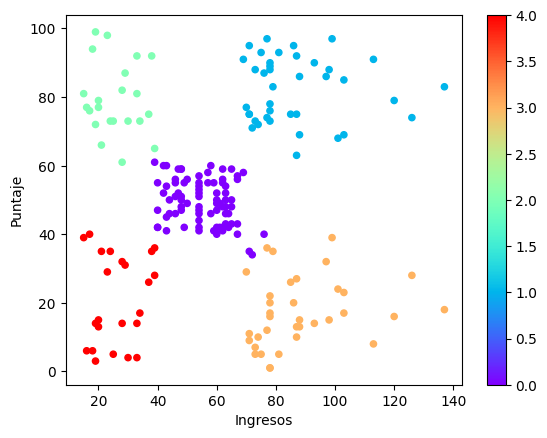

In [ ]:
data.plot.scatter(x='Ingresos', y='Puntaje', c=y_kmeans, cmap='rainbow')

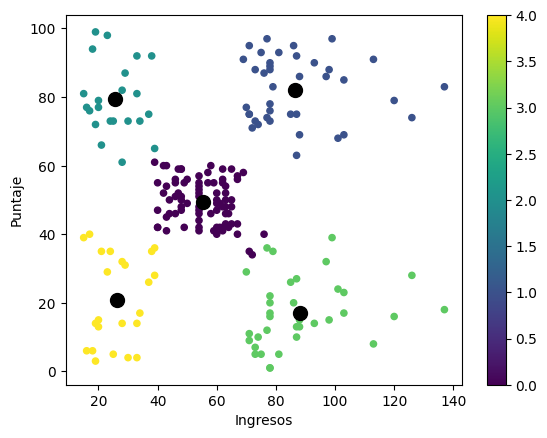

In [ ]:
data.plot.scatter(x='Ingresos', y='Puntaje', c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroides')
plt.show()

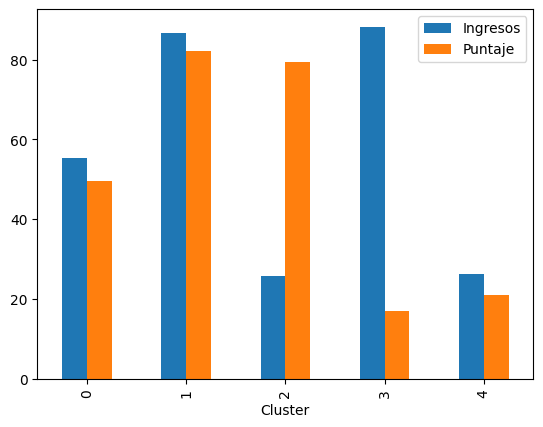

In [ ]:
data['Cluster'] = y_kmeans
data.groupby('Cluster')[['Ingresos', 'Puntaje']].mean().plot.bar()
plt.show()

Metricas

Coeficiente silueta y el indice Davies Bouldin

In [ ]:
# importamos las librerias
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/samples/propiedades.csv')
datos.head()

,1.698042,6.194126
0,1.028309,10.013562
1,1.498665,17.396522
2,0.988410,23.138509
3,1.042310,23.670459
4,1.064285,26.133856


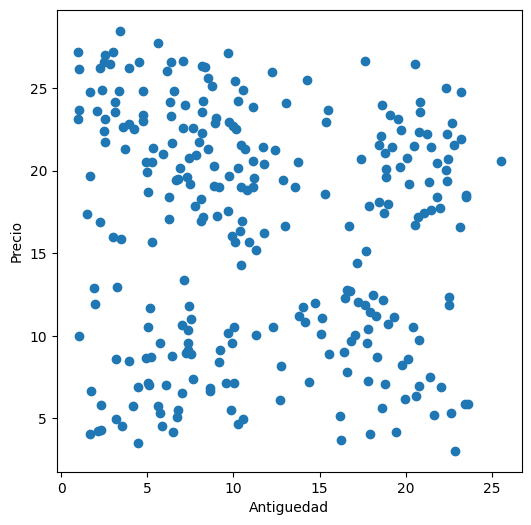

In [ ]:
# graficar los datos
plt.figure(figsize=(6,6))

plt.scatter(datos.iloc[:,0], datos.iloc[:,1])
plt.xlabel('Antiguedad')
plt.ylabel('Precio')
plt.show()

In [ ]:
# silueta 1
# DB 0
clusters = KMeans(n_clusters=5, random_state=1)
clusters.fit_predict(datos.values)

silueta_km = silhouette_score(datos, clusters.labels_)
print(f"Silueta: {silueta_km}")

davies_blouldin_km = davies_bouldin_score(datos, clusters.labels_)
print(f"Davies Bouldin: {davies_blouldin_km}")

Silueta: 0.4736569365401961
Davies Bouldin: 0.7480657783246383


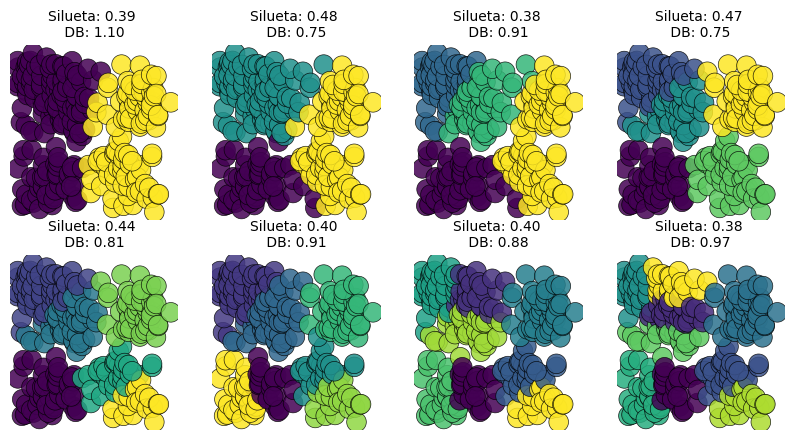

In [ ]:
# veamos ahora los indices para distintos valores de k
fig = plt.figure(figsize=(10,5))

# 8 clusters max
for k in range(2,10):
  clusters = KMeans(n_clusters=k, random_state=1)
  clusters.fit_predict(datos.values)

  silueta_km = silhouette_score(datos, clusters.labels_)
  davies_blouldin_km = davies_bouldin_score(datos, clusters.labels_)

  ax = fig.add_subplot(2,4,k-1)
  ax.scatter(
    datos.values[clusters.labels_ >= 0][:, 0],
    datos.values[clusters.labels_ >= 0][:, 1],
    c=clusters.labels_[clusters.labels_ >= 0],
    s=200, linewidth=0.5, edgecolors="black", alpha=0.85)

  ax.set_title("Silueta: %.2f \n DB: %.2f " %(silueta_km, davies_blouldin_km), fontsize=10)
  ax.axis("off")
plt.show()

DBSCAN

**D**ensity **B**ased **S**patial **C**lustering of **A**pplications with **N**oise

DBSCA es un algoritmo de clustering usado en machine learning y análisis de datos. Es especialmente útil cuando no conoces de antemano cuántos clusters hay, o cuando los clusters tienen formas arbitrarias (no necesariamente esféricas).

¿Qué es DBSCAN?

DBSCAN agrupa puntos que están densamente conectados y marca como ruido (outliers) los puntos que no pertenecen a ningún cluster.

Parámetros principales

eps (epsilon): radio de vecindad para considerar si un punto está cerca de otro.

min_samples: número mínimo de puntos necesarios para formar una región densa (incluye el punto central).

Tipos de puntos

Punto núcleo (core point): tiene al menos min_samples puntos (incluyéndose) en su vecindad de radio eps.

Punto frontera (border point): no cumple con min_samples, pero está dentro de la vecindad de un punto núcleo.

Punto ruido (noise point): no está cerca de ningún punto núcleo.

In [ ]:
# importamos DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
# cargar los datos pero como un numpy array
datos = np.loadtxt('/content/drive/MyDrive/samples/casas.csv', delimiter=',')

In [ ]:
datos

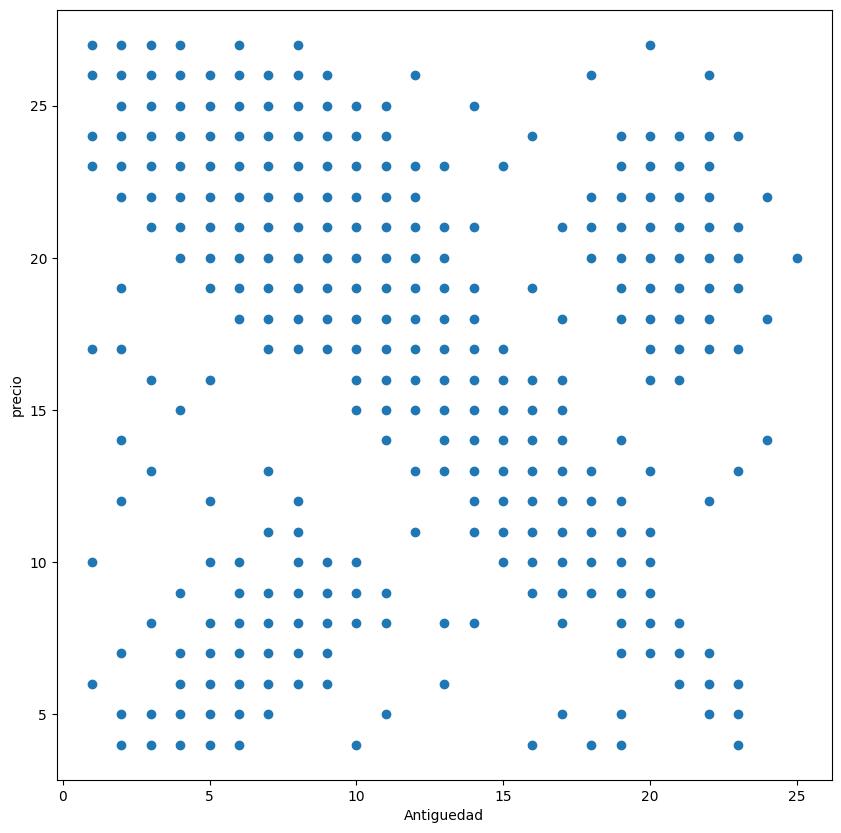

In [ ]:
# graficamos la distribucion
plt.figure(figsize=(10,10))
plt.scatter(datos[:,0], datos[:,1])
plt.xlabel("Antiguedad")
plt.ylabel("precio")
plt.show()

In [ ]:
# creamos una instancia de DBSCAN
clusters = DBSCAN(eps=2, min_samples=10).fit_predict(datos)

In [ ]:
# no es necesario lo hago arriba
# clusters.fit_predict(datos)

array([-1, -1, -1,  0,  0,  0,  0, -1,  1,  1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1

In [ ]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

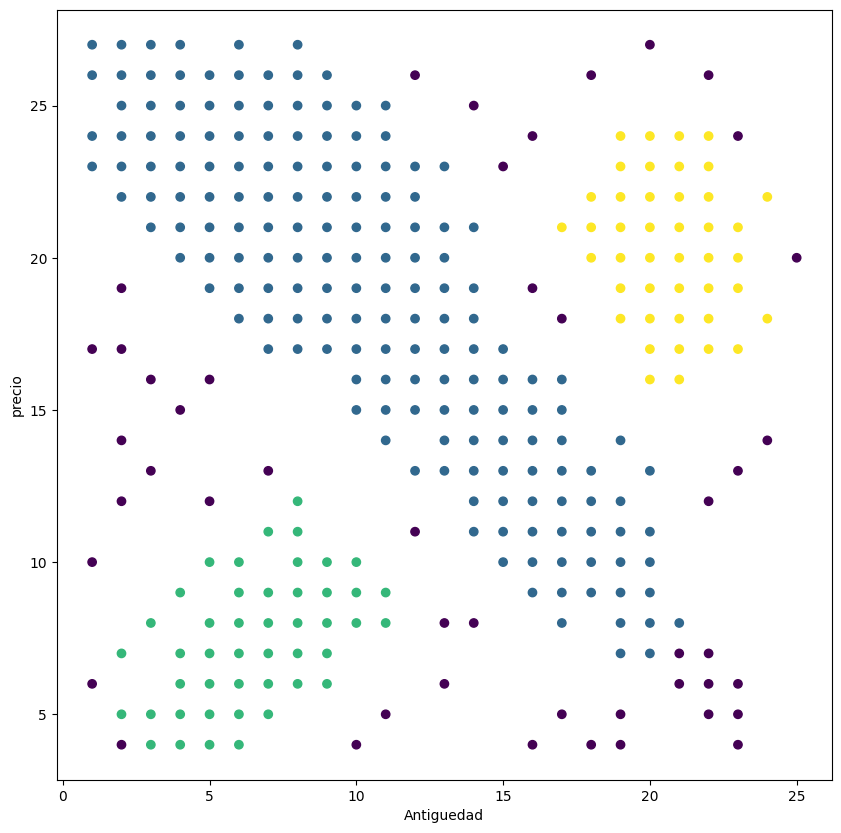

In [ ]:
# graficamos la distribucion
plt.figure(figsize=(10,10))
plt.scatter(datos[:,0], datos[:,1], c=clusters)
plt.xlabel("Antiguedad")
plt.ylabel("precio")
plt.show()

clustering Jerarquico

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
# modulo scipy -- analisis numerico
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

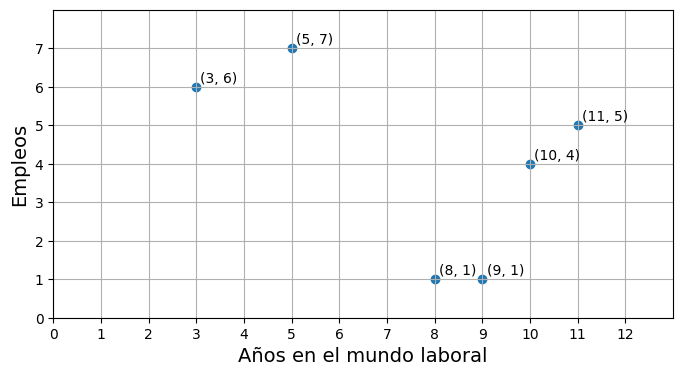

In [ ]:
# Datos del ejemplo -> (años en el mundo laboral, número de empleos)
datos =  np.array([(3, 6), (5, 7),  (8, 1), (9, 1), (10, 4), (11, 5)])

# Coordenadas de los puntos (año, num_empleos)
x = datos[:, 0]
y = datos[:, 1]

# Gráfica de dispersión
plt.figure(figsize=(8, 4))
plt.scatter(x, y)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)

# Detalles de visualizacion
# establecemos los limites del grafico
plt.xlim(0, 13)
plt.ylim(0, 8)
plt.xticks(range(0, 13))
plt.yticks(range(0, 8))
plt.grid(True)

# Imprimir coordenadas
for i in range(len(x)):
    plt.annotate(f"({x[i]}, {y[i]})", (x[i], y[i]),
                 textcoords="offset points", xytext=(3,3), ha="left")

plt.show()

Matriz de similitud

In [ ]:
matriz_similitud = cosine_similarity(datos)
pd.DataFrame(matriz_similitud)

,0,1,2,3,4,5
0,1.000000,0.987763,0.554700,0.543251,0.747409,0.777245
1,0.987763,1.000000,0.677681,0.667545,0.841879,0.865865
2,0.554700,0.677681,1.000000,0.999906,0.967372,0.954662
3,0.543251,0.667545,0.999906,1.000000,0.963811,0.950495
4,0.747409,0.841879,0.967372,0.963811,1.000000,0.998937
5,0.777245,0.865865,0.954662,0.950495,0.998937,1.000000


Matriz de vinculacion

In [ ]:
mat_vincula = linkage(matriz_similitud, method='single')
pd.DataFrame(mat_vincula, columns=["Cluster A", "Cluster B", "Distancia", "Tamaño"])

,Cluster A,Cluster B,Distancia,Tamaño
0,2.0,3.0,0.016244,2.0
1,4.0,5.0,0.042504,2.0
2,0.0,1.0,0.218291,2.0
3,6.0,7.0,0.263610,4.0
4,8.0,9.0,0.511614,6.0


Graficamos el dendograma

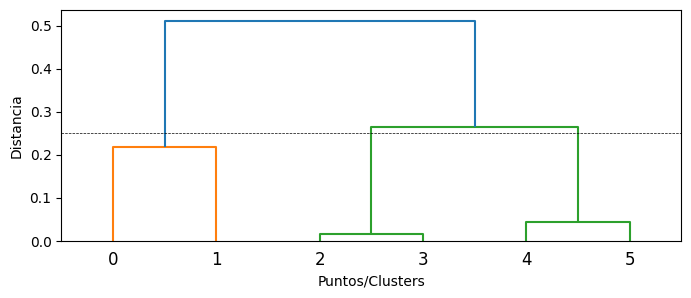

In [ ]:
# configuro el grafico
plt.figure(figsize=(8, 3))
plt.xlabel("Puntos/Clusters")
plt.ylabel("Distancia")
# dendograma
dendrogram(mat_vincula)
# linea de separacion clusters
distancia_max = 0.25

plt.axhline(y=distancia_max, c="k", ls="--", lw=0.5)
plt.show()

Visualizacion de los clusters

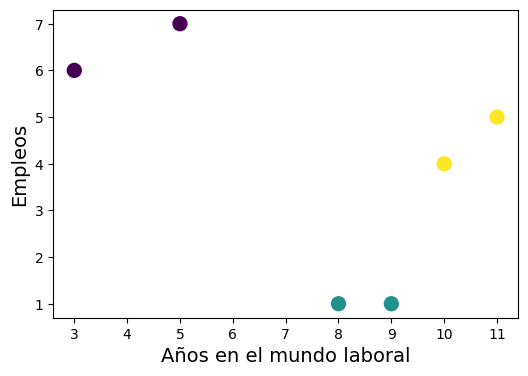

In [ ]:
# obtener los clusters a partir de la distancia maxina = 0,25
distancia_max = 0.25
clusters = fcluster(mat_vincula, distancia_max, criterion="distance")

# Gráfica de dispersión para graficar los clusters
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=clusters, s=100)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)
plt.show()

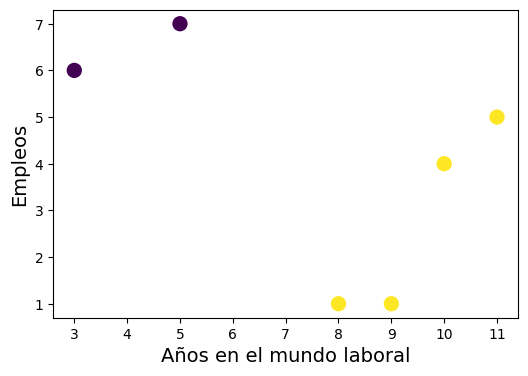

In [ ]:
# obtener los clusters a partir de la distancia maxima = 0,3
distancia_max = 0.3
clusters = fcluster(mat_vincula, distancia_max, criterion="distance")

# Gráfica de dispersión para graficar los clusters
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=clusters, s=100)
plt.xlabel("Años en el mundo laboral", size=14)
plt.ylabel("Empleos", size=14)
plt.show()

Dimensionalidad

In [ ]:
import numpy as np

In [ ]:
# generamos datos aleatorios de 3 variables
# valores del 0  al 9, tamaño del array de 10
x = np.random.randint(10,size=10)
y = np.random.randint(10,size=10)
z = np.random.randint(10,size=10)

In [ ]:
x, y, z

(array([0, 5, 1, 9, 3, 5, 3, 6, 3, 2]),
 array([7, 3, 5, 7, 3, 2, 7, 7, 5, 0]),
 array([4, 0, 0, 9, 4, 2, 5, 9, 3, 5]))

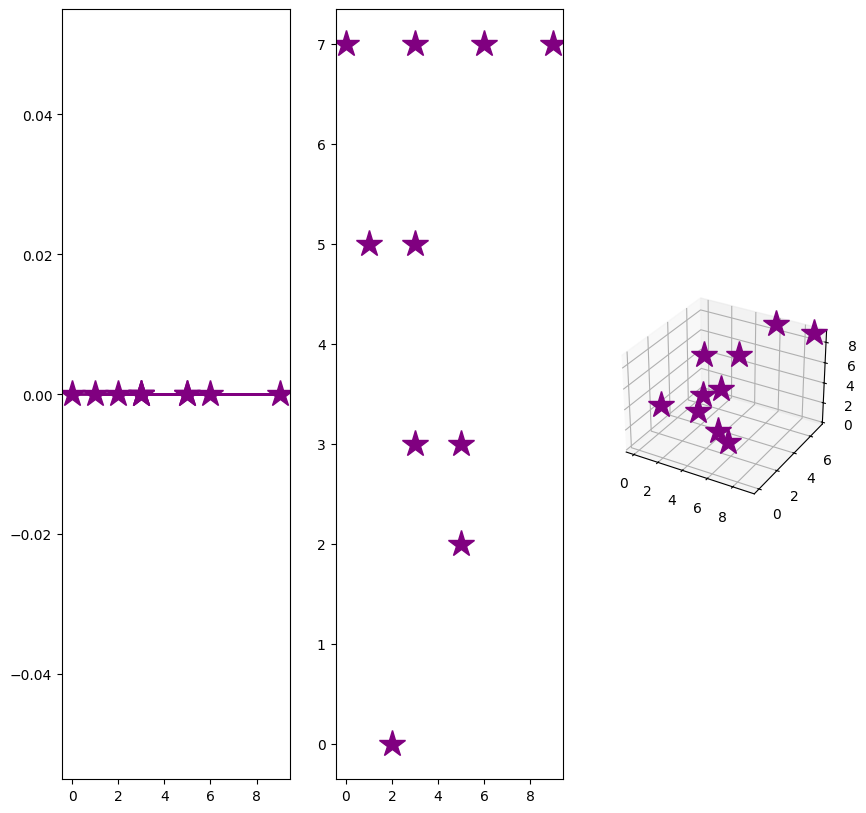

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))

# una dimension
ax =  fig.add_subplot(1,3,1)
ax.plot(x, [0]*10, linewidth=2, marker='*', color='purple', markersize=20)

# dos dimensiones
ax = fig.add_subplot(1,3,2)
ax.plot(x, y, linewidth=0, marker='*', color='purple',markersize=20)

ax = fig.add_subplot(1,3,3, projection='3d')
ax.plot(x, y, z, linewidth=0, marker='*', color='purple',markersize=20)

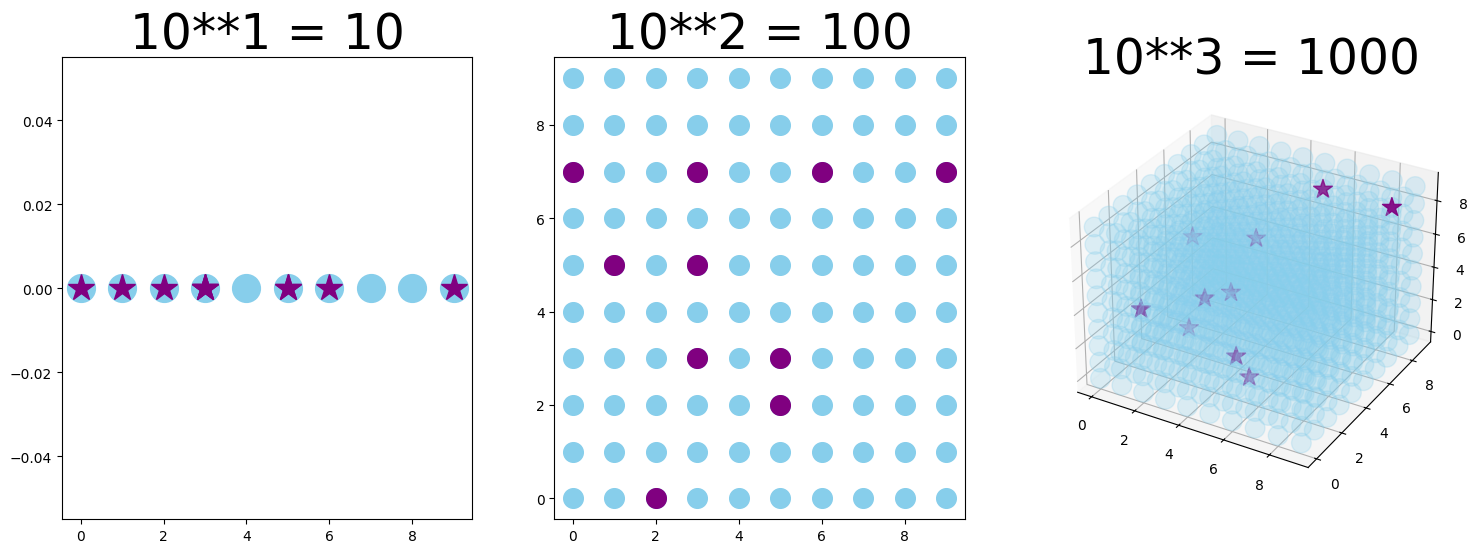

In [ ]:
fig = plt.figure(figsize=(18,6))

# una dimension
ax = fig.add_subplot(1,3,1)
ax.set_title("10**1 = 10", fontsize=35)
ax.plot(range(0,10), [0]*10, linewidth=0, marker='o', color='skyblue',markersize=20)
ax.plot(x, [0]*10, linewidth=0, marker='*', color='purple',markersize=20)

# bidimensional
ax = fig.add_subplot(1,3,2)
ax.set_title("10**2 = 100", fontsize=35)

for i in range(10):
  ax.scatter(range(0,10), [i]*10, s=200, c='skyblue', marker='o')

ax.scatter(x, y, s=200, c='purple')

# tridimensional
ax = fig.add_subplot(1,3,3, projection='3d')

ax.set_title("10**3 = 1000", fontsize=35)

for i in range(10):
  for j in range(10):
    ax.scatter(range(0,10), [i]*10, [j], s=200, c='skyblue', marker='o', alpha=0.25)

ax.scatter(x, y, z, marker='*', s=200, c='purple')

plt.show()

Reduccion de dimensionalidad

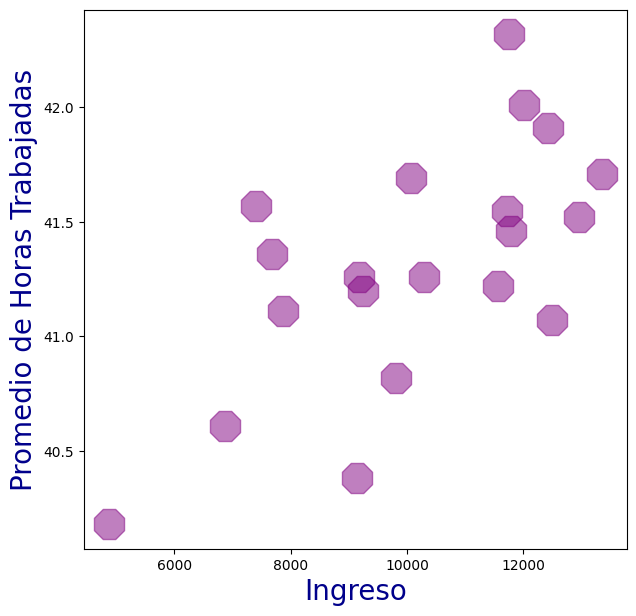

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# simulamos los datos
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}
# los metemos en un dataframe
datos = pd.DataFrame(datos)

# Código de visualización
fig = plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=20, color="darkblue")
plt.ylabel("Promedio de Horas Trabajadas", fontsize=20, color="darkblue")
plt.show()

Paso 1: Estandarizar los datos

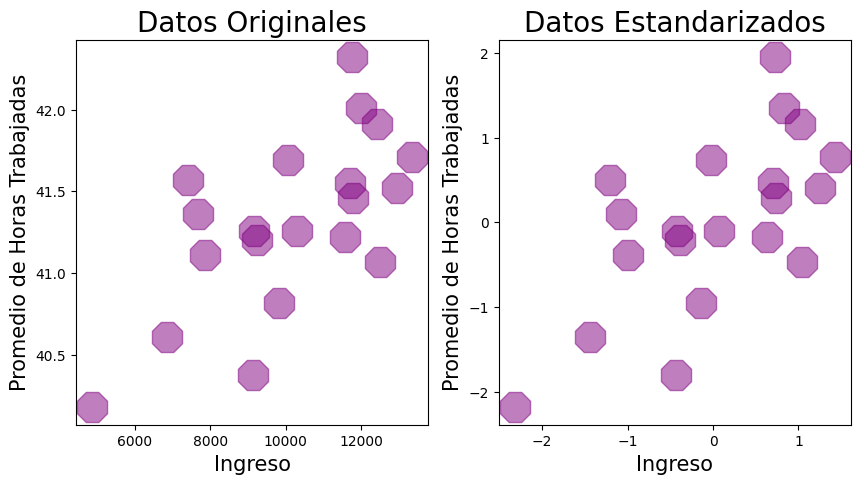

In [ ]:
# usamos standardscales
from sklearn.preprocessing import StandardScaler

# Código de visualización

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Datos Originales", fontsize=20)
ax1.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
ax1.set_xlabel("Ingreso", fontsize=15)
ax1.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)


# Estandarización de los datos - le pasamos los datos
datos = pd.DataFrame(StandardScaler().fit_transform(datos),
                     columns=["ingreso", "horas_trabajadas"])


# Código de visualización
ax2.set_title("Datos Estandarizados", fontsize=20)
ax2.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
ax2.set_xlabel("Ingreso", fontsize=15)
ax2.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)

plt.show()

Paso 2: Matriz de covarianza

                   ingreso  horas_trabajadas
ingreso           1.052632          0.682360
horas_trabajadas  0.682360          1.052632


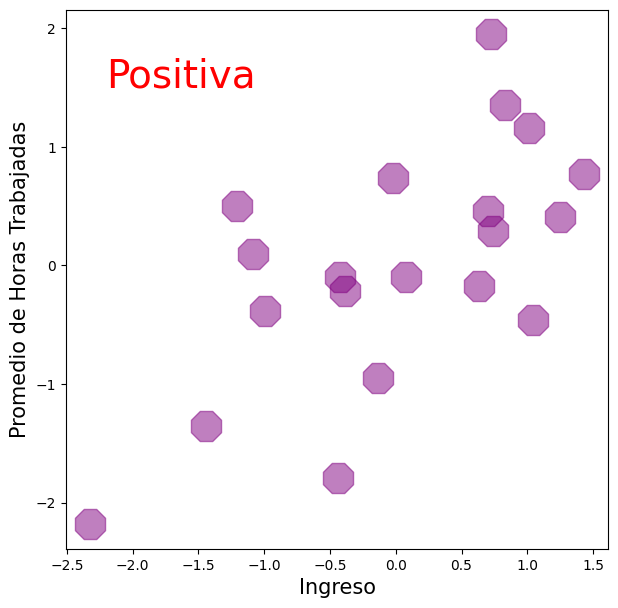

In [ ]:
# imprimimos la matriz de cov
print(datos.cov())

# Código de visualización

plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.text(-2.2, 1.5, "Positiva", fontsize=28, color="red")
plt.show()

Pase 3: Eigenvalores y Eigenvectores

Eigenvector Rojo: [-0.70710678 -0.70710678] Eigenvalor: 1.734991434394586
Eigenvector Azul: [-0.70710678  0.70710678] Eigenvalor: 0.3702717235001506


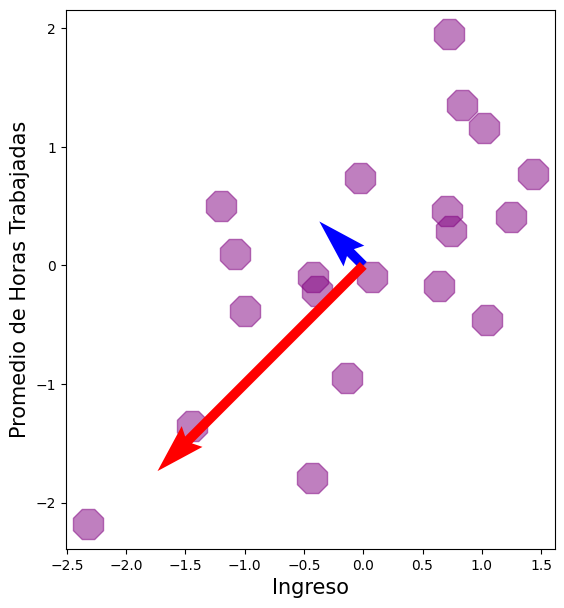

In [ ]:
from numpy.linalg import eig

# Calcular eigenvalores y eigenvectores
valores, vectores = eig(datos.cov())

vector_azul = vectores[:, 0]
vector_rojo = vectores[:, 1]

print("Eigenvector Rojo:", vector_rojo, "Eigenvalor:", valores[1])
print("Eigenvector Azul:", vector_azul, "Eigenvalor:", valores[0])

# Código de visualización

plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Graficando los eigenvectores -- grafica los vectores con las flechas
plt.quiver(0, 0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.quiver(0, 0,
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.show()

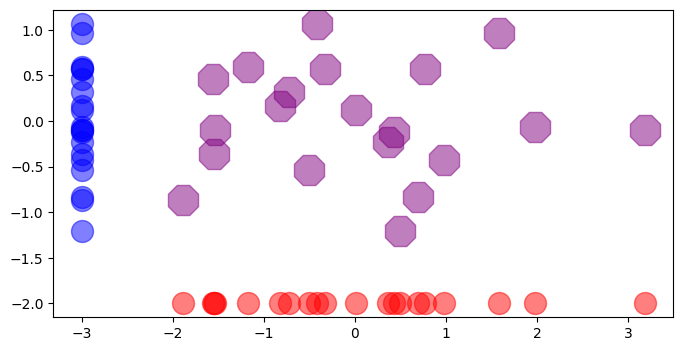

In [ ]:
# Aca los rotamos multiplicandolos por los vectores eigen que ya obtuvimos
proyectados = pd.DataFrame(datos.values @ vectores.T,
                          columns=["ingreso", "horas_trabajadas"])

# Código de visualización
plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(proyectados["ingreso"], proyectados["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión sobre el eje y=-2
plt.scatter(proyectados["ingreso"], [-2]*len(proyectados["ingreso"]),
            s=250, color="red", alpha=0.5)

# proyeccion sobre el x=-3
plt.scatter([-3]*len(proyectados["horas_trabajadas"]), proyectados["horas_trabajadas"],
            s=250, color="blue", alpha=0.5)
plt.show()

En un solo paso

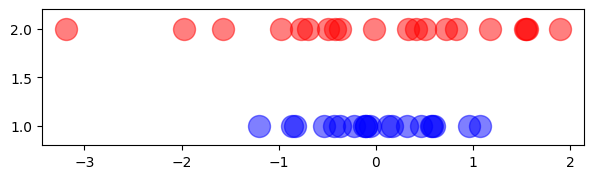

Varianza explicada por cada componente: [1.73499143 0.37027172]
Proporción de varianza explicada por cada componente: [0.82412093 0.17587907]


In [ ]:
from sklearn.decomposition import PCA

# Obtención de componentes principales
# generamos una instancia de PCA
pca = PCA()
# entrenamos y predecimos
datos = pca.fit_transform(datos)

# Código de visualización
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()

# valores eigen
print("Varianza explicada por cada componente:", pca.explained_variance_)
# la varianza explicada en procentaje
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)